In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set_theme(style="darkgrid")

In [3]:
#load data
df = pd.read_csv('real_estate_data_500.csv', sep=';')
df.replace(',', '.')




,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_publication,month_publication,day_of_week_publication,price_meter
0,10,95000,111.0,3,NaN,16.0,65.3,7,14.0,1,...,22175.0,0.0,NaN,1.0,649.0,98.0,2017,5,4,855.855856
1,10,232857,98.4,0,3.1,5.0,60.5,2,NaN,0,...,5819.0,0.0,NaN,1.0,674.0,537.0,2017,11,2,2366.432927
2,19,55714,64.0,2,2.8,5.0,33.0,1,10.0,0,...,25274.0,0.0,NaN,1.0,591.0,45.0,2017,9,5,870.531250
3,5,91429,52.2,2,3.0,5.0,32.8,4,7.9,0,...,4725.0,1.0,549.0,3.0,174.0,68.0,2016,6,3,1751.513410
4,19,70000,42.0,1,27.5,24.0,37.7,19,11.0,2,...,9760.0,0.0,NaN,0.0,NaN,61.0,2017,4,1,1666.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9,74286,57.1,3,2.5,9.0,49.1,3,6.4,1,...,15391.0,0.0,NaN,0.0,NaN,146.0,2018,2,0,1300.980736
496,15,58571,37.6,1,2.7,17.0,14.4,3,9.7,1,...,12665.0,0.0,NaN,0.0,NaN,207.0,2017,11,0,1557.739362
497,7,50000,37.0,1,NaN,9.0,20.5,5,6.5,1,...,13568.0,0.0,NaN,1.0,837.0,34.0,2017,5,4,1351.351351
498,12,77143,43.0,1,NaN,18.0,18.0,12,10.0,0,...,14296.0,1.0,401.0,0.0,NaN,57.0,2017,11,0,1794.023256


In [4]:
#Examine the following parameters: price, total area, number of rooms, ceiling height, 
#distance from the center. Use descriptive statistics. Visualize these variables. Draw 
#conclusions:

key_vars = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest']

# descriptive statistics /transposed for better readability
missing_values = df[key_vars].isnull().sum()

In [5]:
#now the descriptive statistics
display(df[key_vars].describe().T)


,count,mean,std,min,25%,50%,75%,max
last_price,500.0,105451.164000,81849.964208,32143.0,60000.0,78571.00,114071.50,785714.0
total_area,500.0,65.468400,41.703327,19.0,41.0,54.95,75.00,374.6
rooms,500.0,2.192000,1.462674,0.0,1.0,2.00,3.00,19.0
ceiling_height,349.0,2.914040,1.870615,2.4,2.6,2.70,3.00,27.5
cityCenters_nearest,496.0,11562.707661,4735.071753,387.0,8520.0,12178.00,14765.25,28018.0


RESULT OF DESCRIPTIVE ANALISYS

 - last_price: 
 The average price at time of unpublication of apartments is around €105,451.2, but the high 
standard deviation (€81,849.96) indicates a large variation in prices. This suggests there is a wide 
range of prices in the market.
 The minimum price €32,143 and the maximum price €785,714 show that there are very low
priced apartments as well as very high-end properties.
 
 - total_area (total_area - area of the apartment in square meters (m²)):
 The average total area of apartments is 65.47 m², with a standard deviation of 41.70 m², 
suggesting significant diversity in apartment sizes.
 The minimum area (19 m²) indicates very small apartments, while the maximum (374.6 m²) 
suggests the existence of large apartments or possibly houses.
 
 - rooms - number of rooms:
 On average, apartments have a little over 2 rooms, which is quite standard. The standard deviation 
(1.46) indicates that there is a wide variety in the number of rooms.
 The presence of apartments with 0 rooms might indicate studios or data entry errors.
 
 - ceiling_height - ceiling height (m):
 The average ceiling height is around 2.91 m, which is relatively standard for apartments.
 The high standard deviation (1.87 m) and the maximum height (27.5 m) might be attributed to 
unique properties, such as lofts or commercial spaces converted into residences.
 The difference in the number of observations for 
ceiling_height (349) compared to other variables (500) may indicate missing or unrecorded data.

- cityCenters_nearest - distance au centre-ville (m):
 On average, the apartments are located about 11.56 km from the city center, with distances ranging 
from 387 m to 28 km

0 last_price
1 total_area
2 rooms
3 ceiling_height
4 cityCenters_nearest


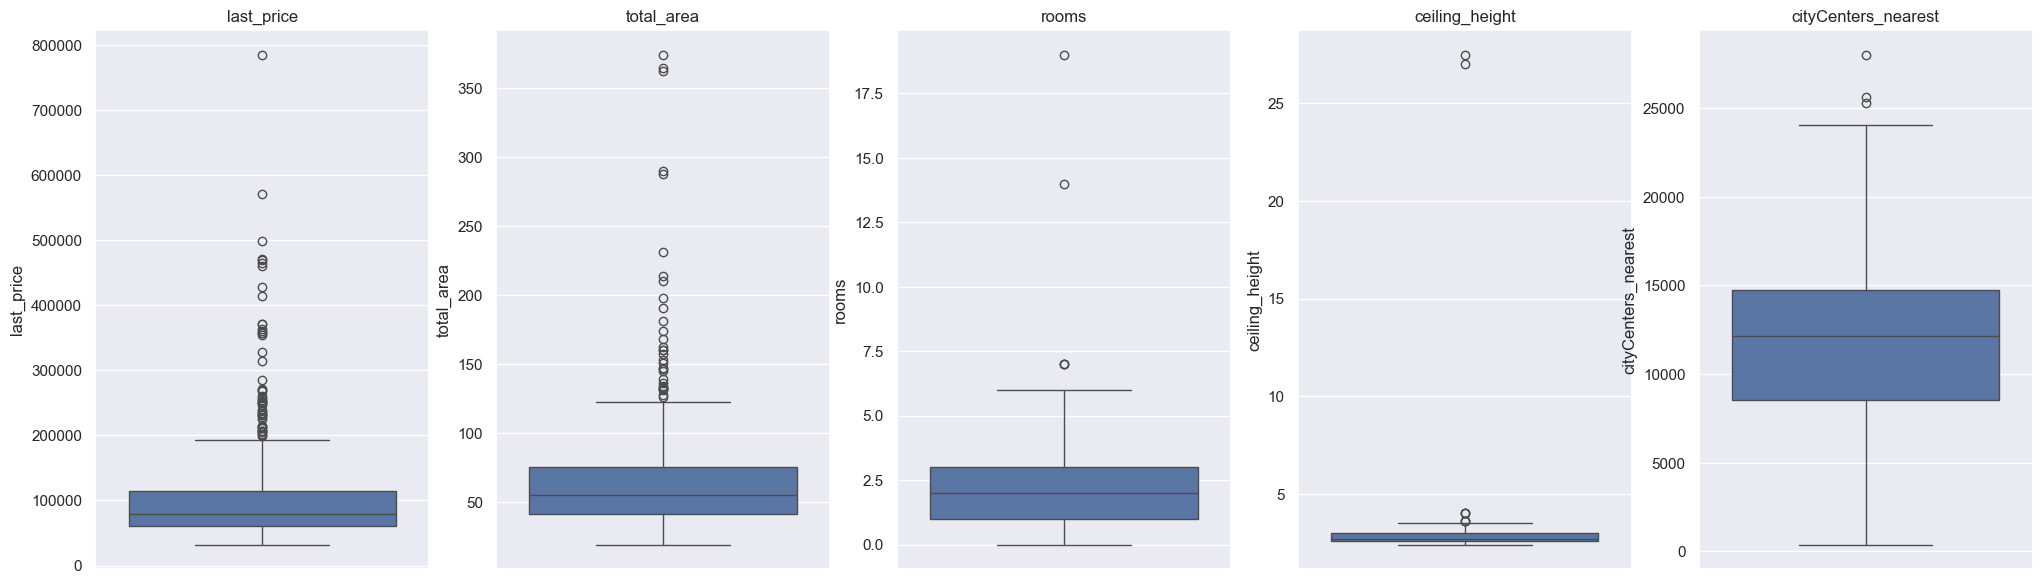

In [6]:
# let's visualize the data
# Boxplot
fig, ax = plt.subplots(1, 5, figsize=(25, 7))
for i, var in enumerate(key_vars):
    print(i, var)
    sns.boxplot(y=var, data=df, ax=ax[i])
    ax[i].set_title(var)
plt.show()


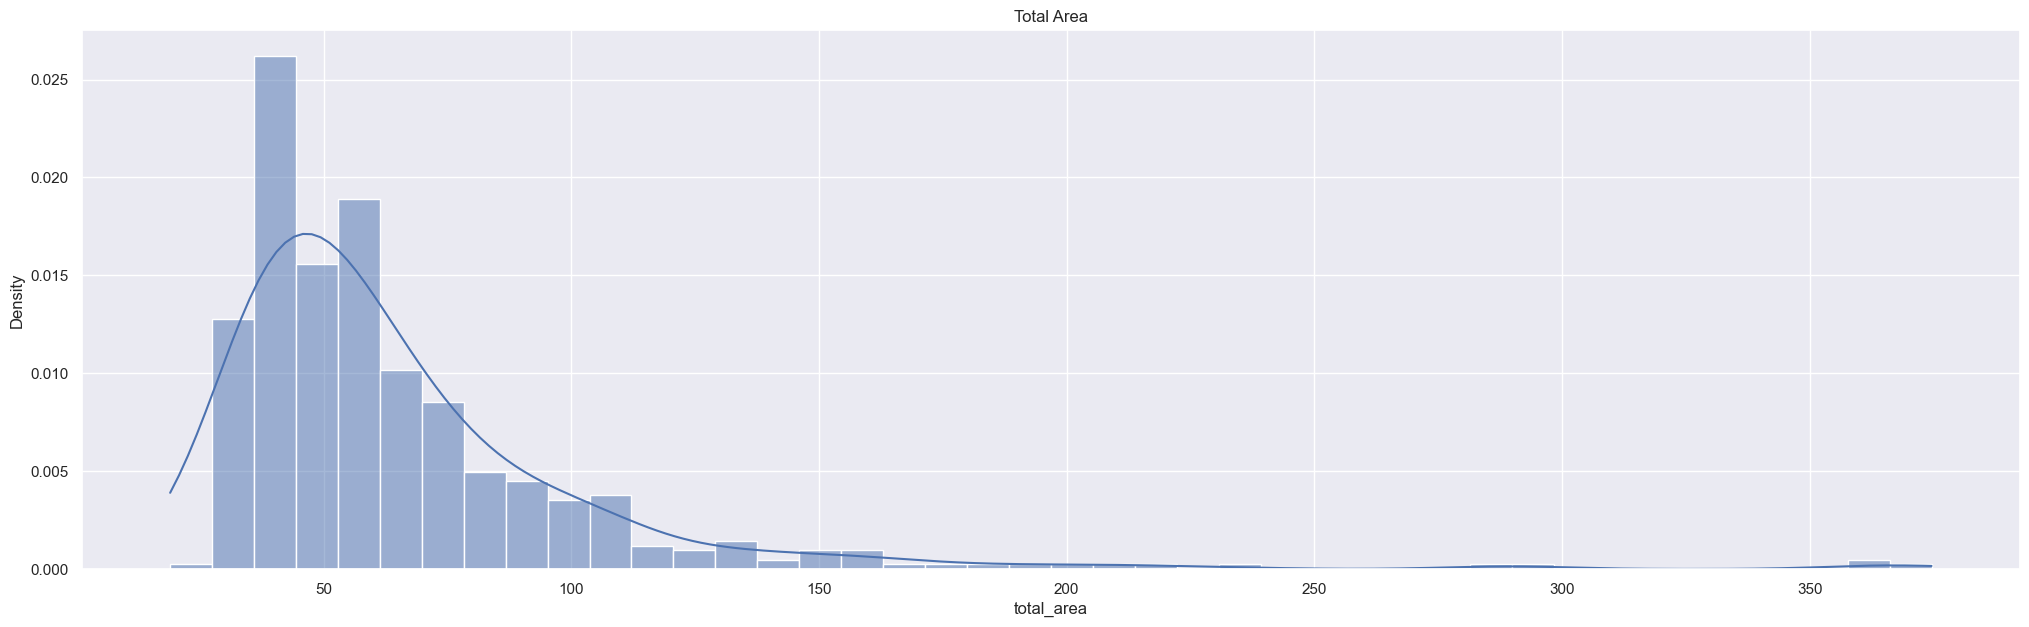

In [7]:
# Histogram
fig= plt.subplots(figsize=(25, 7))

# get the total_area data and show the density

total_area = df['total_area']
# plot the histogram with sns and show the density in y axis instead of count
sns.histplot(total_area, kde=True, stat='density')
plt.title('Total Area')
plt.show()


2-  Make a hypothesis about 3 other variables that you think affect the price significantly.
 Visualize the interaction of price and each of these variables. Draw conclusions:
 About 3 variables that i think can affect the price significantly:
 
 - living area: a larger living areas are typically valued higher , when the living area increases, the price tends 
to increas too…
 - parks nearest: More the parks are nearest to the apartments, more the price is higher
 - kitchen area: More the kitchen area is  large, more the price is high.

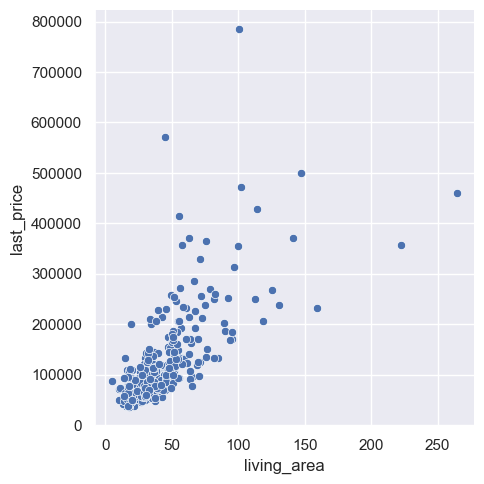

In [8]:
# lets visualize the interaction between these 3 variables vs price
# use sns express for this.

# last_price vs total_area
sns.relplot(data=df, y=df["last_price"], x=df["living_area"])


 The scatter plot  shows a clear upward trend (strong correlation). Larger living areas lead to higher prices.

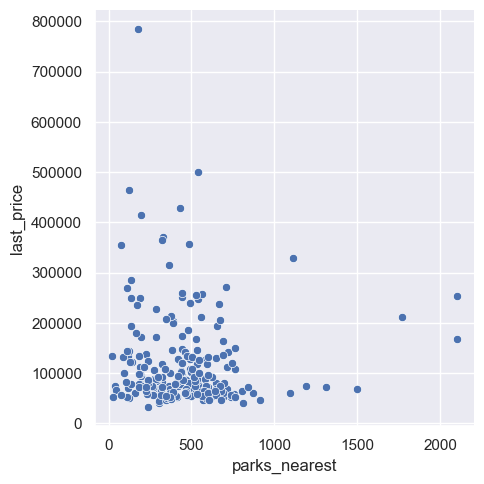

In [9]:
# last_price vs park_nearest
sns.relplot(data=df, y=df["last_price"], x=df["parks_nearest"])


The scatter plot  appear random, with no distinct trend, confirming the weak correlation. This suggests 
that distance to parks isn't a key determinant of price in this dataset.

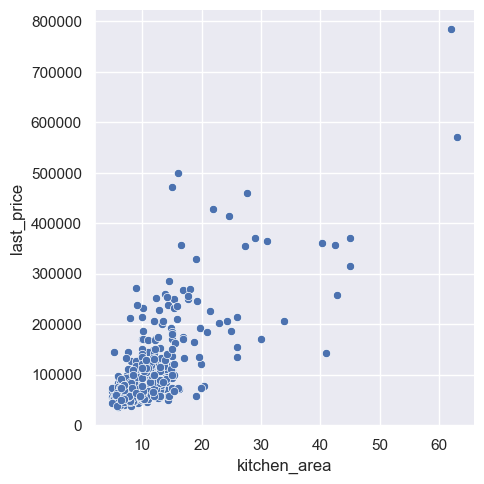

In [10]:
# last_price vs kitchen_area
sns.relplot(data=df, y=df["last_price"], x=df["kitchen_area"])

 There appears to be a general positive relationship: apartments with larger kitchen areas tend to have 
higher prices. This supports the hypothesis that larger kitchens are associated with higher property 
values.

 3- Study the duration of the apartment sale process. Plot a histogram and a boxplot.
 Calculate descriptive statistics and describe the usual duration of a sale. When can
 sales be considered too fast and when too long?

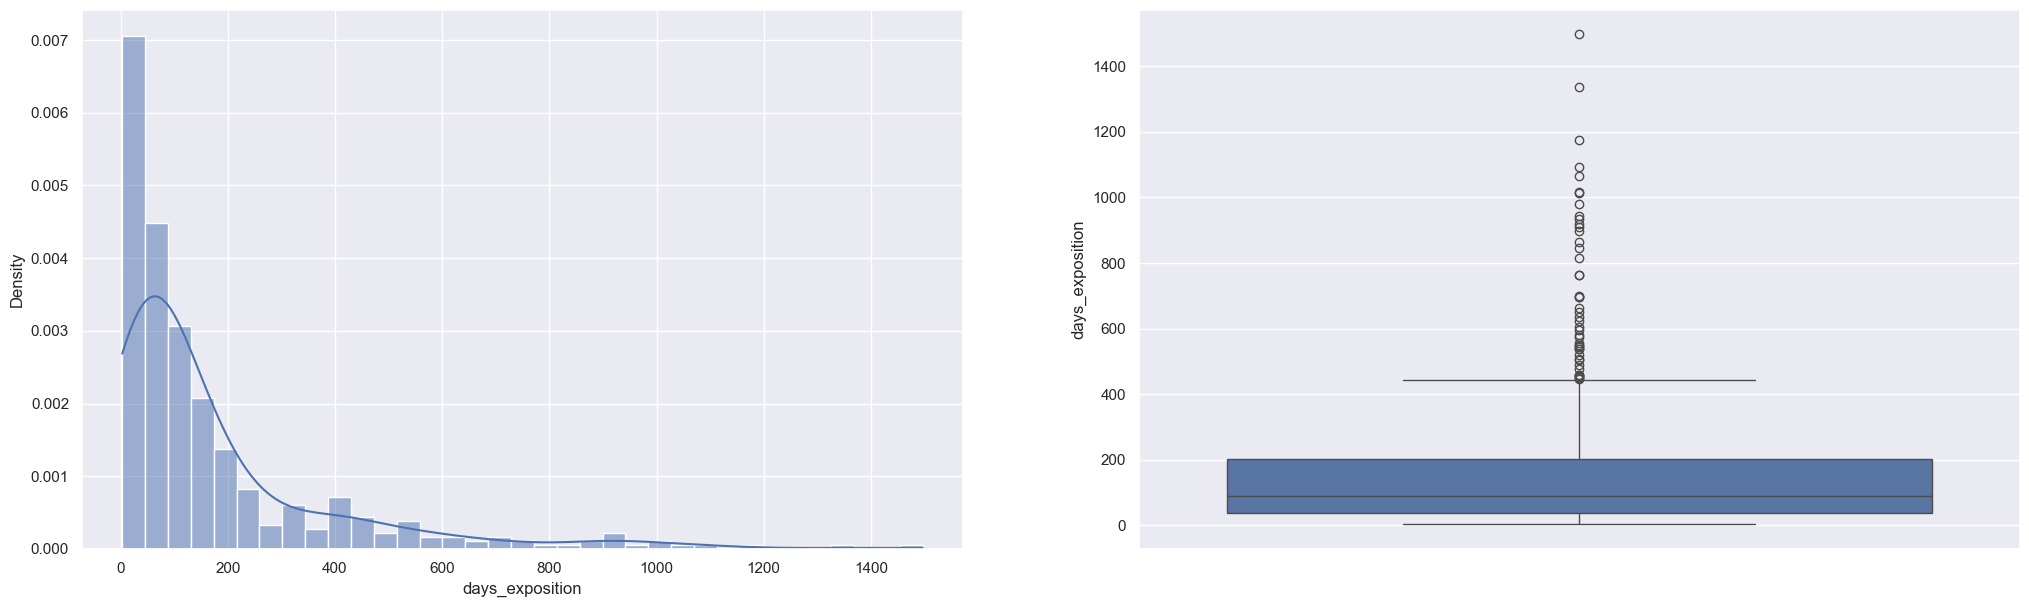

In [11]:
# Histogram and box of days_exposition
fig, ax = plt.subplots(1, 2, figsize=(25, 7))
sns.histplot(df['days_exposition'], kde=True, stat='density', ax=ax[0])
sns.boxplot(y='days_exposition', data=df, ax=ax[1])
plt.show()

In [12]:
# Descriptive analysis of days_exposition
display(df['days_exposition'].describe())


count     428.000000
mean      175.934579
std       229.413804
min         3.000000
25%        38.750000
50%        90.000000
75%       201.250000
max      1497.000000
Name: days_exposition, dtype: float64

 - Fast sale: From 39 days (25th percentile), which is less than 1.5 months, we can consider the sale 
to be relatively fast.
 - Too long sale:  Beyond 202 days (75th percentile), which is more than 6.5 months, we can consider 
the sale to be taking too long.
 - Between 39 days and 176 days, we are in the range of "normal" or usual sale duration, with half of 
the sales being completed within this window.
 Additionally, sales over 447 days (90th percentile) can be considered aberrant or outliers.

 4-  Find out which apartments are in the center. Create a column with the distance to the 
center in kilometers, round to whole numbers (distance_km = 
round(cityCenters_nearest / 1000)). After that, calculate the average price for each 
kilometer. Build a graph: it should show how the price depends on the distance from the 
center. Define the border where the graph changes a lot - this will be the central area.

In [24]:
# a new column with the distance to the center in km
df['disante_to_center_km'] = round(df['cityCenters_nearest'] / 1000)


# clacul of the average price for each km to the center
avg_price_by_km = df.groupby('disante_to_center_km')['last_price'].mean().sort_index()
#print(avg_price_by_km)
# a new column with the price by km to the center 
df['avg_price_by_km'] = df['disante_to_center_km'].map(avg_price_by_km)

display(df[['avg_price_by_km', 'disante_to_center_km']])

,avg_price_by_km,disante_to_center_km
0,73493.625000,22.0
1,186551.533333,6.0
2,55714.000000,25.0
3,169553.407407,5.0
4,90872.700000,10.0
...,...,...
495,93271.740741,15.0
496,83066.733333,13.0
497,84068.530612,14.0
498,84068.530612,14.0


In [96]:
#  Build a line graph with px: it should show how the price depends on the distance from the 
# center. Define the border where the graph changes a lot - this will be the central area.
df_sorted = df.sort_values(by=['disante_to_center_km', 'avg_price_by_km'], ascending=[True, True])

x = df_sorted['disante_to_center_km']
y = df_sorted['avg_price_by_km']

fig = px.line(x=x, y=y, title='Price by distance to the center')

# after plotting the graph, we can see that the price changes a lot at 9 km
# lets add a vertical line to show this
fig.add_vline(x=9, line_dash="dash", line_color="red")

#updtae x and y labels
fig.update_xaxes(title_text='Distance to the center (km)')
fig.update_yaxes(title_text='Average price')
fig.show()


 5- Select a segment of apartments in the center. Analyze this territory with following 
parameters: total area, price, number of rooms, and ceiling height. Do they differ from the 
general conclusions in the entire database?


In [53]:
#  select the segment of apartments in the central area and analyze it.
# in this case, we will consider the central area as the first 9 km from the center.
# lets create a new column for the appartments in the central (<= 9 km) 
keys_col = ['total_area', 'last_price', 'rooms', 'ceiling_height']

#if the distance is less than 9 km, then it is in the center(1), otherwise it is not(0)
df['center_apartments'] = (df['disante_to_center_km'] <= 9)
df['center_apartments'] = df['center_apartments'].astype(int)


# get the data for the center apartments
df_center = df[df['center_apartments'] == 1]

#summarize the data
display(df_center[keys_col].describe().T)

,count,mean,std,min,25%,50%,75%,max
total_area,148.0,86.709459,57.438057,19.0,50.0,70.3,104.425,374.6
last_price,148.0,149603.074324,109981.076362,32143.0,82857.0,117857.0,171429.000,785714.0
rooms,148.0,2.817568,2.122241,0.0,2.0,2.0,3.000,19.0
ceiling_height,111.0,2.998198,0.323330,2.5,2.8,3.0,3.200,4.0


- Area: The average total area (86.7 m²) suggests that the apartments aren't excessively large, possibly indicative of urban dwellings.

- Price: The average last price of apartments is quite high (149,603), which supports the idea that apartments in prime locations (e.g., the city center) tend to be more expensive.
  
- Rooms: The average number of rooms (2.82) suggests many apartments are relatively small, which is typical for city center apartments where space is limited.
  
- Ceiling Height: The ceiling height average of 3.0 m further suggests these might be more modern or recently renovated apartments, which can often be found in central areas.

Step 2. Bivariate analysis

   1- With an appropriate statistical test, compare the mean prices of apartments in the city 
center and outside of it. Are they statistically different? (Tip: first, create a separate 
variable -  a binary indicator of whether the apartment is in the city center.)
   2- With an appropriate statistical test, explore whether the mean prices for apartments 
differ depending on the number of balconies, parks, and ponds within 3 km. Make a 
conclusion – does having the possibility to enjoy the outside (the nature) matter?
   3- Select 5 variables that, at this point, seem to be the most important in determining the 
prices of apartments. Study their correlation with the prices. Visualize it. 
   4- Fit a linear regression model with the same 5 variables as predictors, and price as the 
dependent variable. Comment on the overall significance and quality of the model. 
Interpret the coefficients. Make conclusions - are these variables important determinants 
of prices for apartments?


In [74]:
#lets do the test mean comparaison of price between the center(0) and the rest of the apartments
# we will use the t-test for this

# get the data for the center and rest of the apartments
df_center = df[df['center_apartments'] == 1]
df_rest = df[df['center_apartments'] == 0]

# stat desc for each group
center_mean = df_center['last_price'].mean()
rest_mean = df_rest['last_price'].mean()

center_std = df_center['last_price'].std()
rest_std = df_rest['last_price'].std()

center_count = df_center['last_price'].count()
rest_count = df_rest['last_price'].count()

# diff of means 
diff_mean = rest_mean - center_mean


# lets do the t-test for each key variable
t_stat, p_value = stats.ttest_ind(df_center['last_price'], df_rest['last_price'], nan_policy='omit')

table = pd.DataFrame({
    "Group": ['1', '0'],
    "Mean": [center_mean, rest_mean],
    "Standard deviation": [center_std, rest_std],
    "Count": [center_count, rest_count],
    "Difference of means": diff_mean,
    "combined_count": [center_count + rest_count, np.nan],
    
    "t-statistic": [t_stat, np.nan],
    "p-value": [p_value, np.nan]
    
})

display(table)



,Group,Mean,Standard deviation,Count,Difference of means,combined_count,t-statistic,p-value
0,1,149603.074324,109981.076362,148,-62715.781711,500.0,8.341388,7.252244e-16
1,0,86887.292614,57366.360226,352,-62715.781711,NaN,NaN,NaN


Yes They are statistically different --> diif of mean is != 0.
 - Group 0 (Outside the Center) Mean price = 86,887.29, with a standard deviation of 57,366.36.
 - Group 1 (City Center): Mean price = 149,603.1, with a standard deviation of 109,981.1.
 The apartments in the city center are, on average, significantly more expensive than those outside 
the center.
 The difference in mean prices is negative and indicates that apartments in the city center are more 
expensive than those outside.
 the p-value = 7.252244e-16, which is well below the standard significance level of 0.050, so
 we can  reject the null hypothesis Ho Mean(Outside Center)=Mean(City Center):  This means that 
the difference in mean prices is statistically significant

 ### 2- With an appropriate statistical test, explore whether the mean prices for apartments 
### differ depending on the number of balconies, parks, and ponds within 3 km. Make a 
### conclusion – does having the possibility to enjoy the outside (the nature) matter?

In [106]:
## With an appropriate statistical test, explore whether the mean prices for apartments 
# differ depending on the number of balconies, parks, and ponds within 3 km

# THE ANOVA TEST
# we will use the ANOVA test to compare the mean prices of the apartments depending on the number of balconies, parks, and ponds
# within 3 km

# get the data for the number of balconies, parks, and ponds within 3 km
df_balconies = df.groupby('balcony')['last_price'].apply(list)
df_parks = df.groupby('parks_around3000')['last_price'].apply(list)
df_ponds = df.groupby('ponds_around3000')['last_price'].apply(list)


# ANOVA test for the number of balconies
f_stat_balconies, p_value_balconies = stats.f_oneway(*df_balconies)
f_stat_parks, p_value_parks = stats.f_oneway(*df_parks)
f_stat_ponds, p_value_ponds = stats.f_oneway(*df_ponds)

table = pd.DataFrame({
    "Variable": ['Balconies', 'Parks', 'Ponds'],
    "F-statistic": [f_stat_balconies, f_stat_parks, f_stat_ponds],
    "p-value": [p_value_balconies, p_value_parks, p_value_ponds]
})

display(table)



,Variable,F-statistic,p-value
0,Balconies,2.199883,6.794246e-02
1,Parks,11.521941,2.601677e-07
2,Ponds,5.888097,5.924909e-04


- #### number of balconies conclusions:
F-statistic: 2.20
 p-value: 0.0679 (not statistically significant at the 5% level), Ho accept
 Conclusion: The number of balconies does not have a statistically significant impact on the 
average price of apartments.
 Balconies might still contribute qualitatively, but the effect is not strong enough to show up in 
the overall variance of price.

- ####  The number of parks within 3 km conclusion:
F-statistic: 11.52
 p-value: 0.0000 (highly statistically significant)
 Conclusion: The number of parks within 3 km has a significant effect on the price of 
apartments.
 This implies that the availability of parks in the city positively or negatively influences 
prices, depending on the number of parks.

- ####  number of ponds within 3 km conclusion:
 F-statistic: 5.89
 p-value: 0.0006 (statistically significant)
 Conclusion: The number of ponds within 3 km also significantly affects the average price of 
apartments.
 While the effect might not be as strong as parks, proximity to ponds contributes to the variance 
in apartment prices.

 3-  Select 5 variables that, at this point, seem to be the most important in determining the
 prices of apartments. Study their correlation with the prices. Visualize it.

In [108]:
# selection of the 5 variables
vars = ['total_area', 'rooms', 'kitchen_area', 'living_area', 'parks_nearest']

# correlation matrix
corr_matrix = df[vars].corr()
display(corr_matrix)

,total_area,rooms,kitchen_area,living_area,parks_nearest
total_area,1.000000,0.835327,0.616371,0.940513,-0.073610
rooms,0.835327,1.000000,0.298088,0.900928,-0.077594
kitchen_area,0.616371,0.298088,1.000000,0.403405,-0.077167
living_area,0.940513,0.900928,0.403405,1.000000,-0.083432
parks_nearest,-0.073610,-0.077594,-0.077167,-0.083432,1.000000


In [134]:
# lets visualize the correlation with a scatter plot
for var in vars:
    #draw with px
    fig = px.scatter(df, x=var, y='last_price', title=f'Price vs {var}')
    fig.show()

4. Fit a linear regression model with the same 5 variables as predictors, and price as the 
dependent variable. Comment on the overall significance and quality of the model. 
Interpret the coefficients. Make conclusions - are these variables important determinants 
of prices for apartments?


In [ ]:
#4. Fit a linear regression model with the same 5 variables as predictors, and price as the dependent variable.
import statsmodels.api as sm

# define the variables
X = df[vars]  # les 5 variables prédictives
y = df['last_price']

# add a constant to the model
X = sm.add_constant(X)

# adjust the model
model = sm.OLS(y, X).fit()

# we'll extract the results and put them in a dataframe
results_df = pd.DataFrame({
    "Coefficient": model.params,
    "P-value": model.pvalues,
    "Standard Error": model.bse,
    "[95% Conf. Interval] Lower": model.conf_int()[0],
    "[95% Conf. Interval] Upper": model.conf_int()[1]
})

# round the results to 2 decimal places
results_df = results_df.round(2)

# 
display(results_df)

,Coefficient,P-value,Standard Error,[95% Conf. Interval] Lower,[95% Conf. Interval] Upper
const,-29506.50,0.00,7920.27,-45123.98,-13889.02
total_area,2178.37,0.00,257.84,1669.96,2686.78
rooms,-23435.90,0.00,4989.89,-33275.14,-13596.66
kitchen_area,2586.62,0.00,618.82,1366.40,3806.84
living_area,351.67,0.33,356.61,-351.51,1054.85
parks_nearest,16.17,0.06,8.58,-0.74,33.07


### **Conclusion on the Regression Results**  

The regression analysis provides insights into how different factors influence apartment prices. Here’s what we can conclude:  

1. **Total Area (+2178.37, p < 0.01)**  
   - A significant positive effect on price. Larger apartments tend to be more expensive.  

2. **Number of Rooms (-23435.90, p < 0.01)**  
   - Surprisingly, the number of rooms has a **negative** coefficient, meaning more rooms **decrease** the price when controlling for other factors. This may indicate that larger but inefficiently divided spaces are less valuable.  

3. **Kitchen Area (+2586.62, p < 0.01)**  
   - A larger kitchen strongly increases the price, suggesting that buyers value spacious kitchens.  

4. **Living Area (+351.67, p = 0.33)**  
   - The effect is **not statistically significant** (p > 0.05), meaning we **cannot** conclude that living area size affects price in this model.  

5. **Proximity to Parks (+16.17, p = 0.06)**  
   - A weak positive effect, but it is **borderline insignificant** (p ≈ 0.06). It suggests that proximity to parks *may* slightly increase price, but the evidence is not strong.  

6. **Intercept (-29506.50, p < 0.01)**  
   - The negative constant suggests that, in the absence of other variables, the baseline price would be negative. However, this is not directly interpretable and mainly adjusts the model.